This script plots the fig3 and fig4 in the paper

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
gene_simplify = {
    "fridman":"Fridman",
    "sasp2":"SASP2",
    "cellage":"CellAge",
    "senmayo":"SenMayo",
    "union":"Union",
    "all_nonsmoker":"All",
    "all_smoker":"All",
    "all":"All"
}

## R2 for HLCA

In [3]:
table = pd.read_csv("results/eval/performances_HLCA_loo_polyEN.csv")

In [4]:
nonsmoker_table = table.loc[table['group'] == "nonsmoker",]
dfs = []
n_rep = 5
for i,((annLevel,ct),df) in enumerate(nonsmoker_table.groupby(["ann_level","cell_type"])):
    ct_df = []
    for (gene_type,use_pca),dff in df.groupby(["gene_type","use_pca"]):
        dff["R2_mean"] = dff["R2"].mean()
        ct_df.append(dff)
    ct_df = pd.concat(ct_df)    
    ct_df.sort_values(by = "R2_mean",ascending = False,inplace=True)
    ct_df = ct_df.iloc[0:n_rep,] # pick the best one for each cell type
    ct_df["ind"] = str(i)
    dfs.append(ct_df)
    #df["R2_mean"] = df["R2"].mean()
    #df["ind"] = str(i)
    #dfs.append(df)

nonsmoker_table = pd.concat(dfs).sort_values(by = "R2_mean", ascending = False)

smoker_table = table.loc[table['group'] == "smoker",]
dfs = []
for i,((annLevel,ct),df) in enumerate(smoker_table.groupby(["ann_level","cell_type"])):
    ct_df = []
    for (gene_type,use_pca),dff in df.groupby(["gene_type","use_pca"]):
        dff["R2_mean"] = dff["R2"].mean()
        ct_df.append(dff)
    ct_df = pd.concat(ct_df)    
    ct_df.sort_values(by = "R2_mean",ascending = False,inplace=True)
    ct_df = ct_df.iloc[0:n_rep,] # pick the best one for each cell type
    ct_df["ind"] = str(i)
    dfs.append(ct_df)
    
smoker_table = pd.concat(dfs).sort_values(by = "R2_mean", ascending = False)

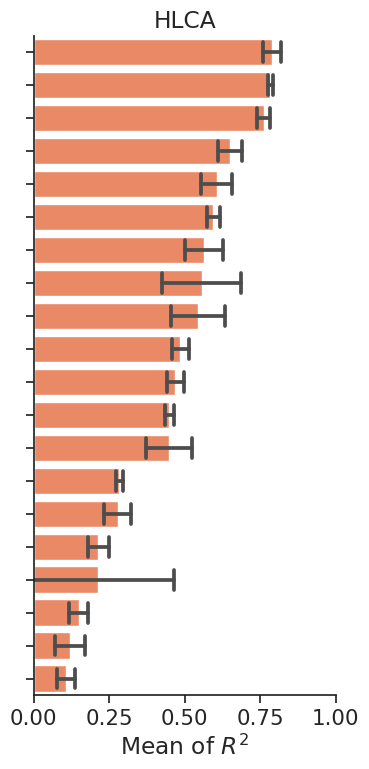

In [7]:
sns.set_theme(font_scale=1.4,
              style="ticks",
              rc={"axes.spines.right": False, "axes.spines.top": False, 'figure.figsize':(4,8)}
             )
plot_data = nonsmoker_table.loc[:,["R2","ind"]]

# keep top 15
plot_data = plot_data.iloc[:100,]

ax = sns.barplot(
    data=plot_data, x="R2", y="ind",color = "#FF7F50",
    errorbar = "sd", capsize=.6, errcolor=".3"
)
ax.set_xlabel(r"Mean of $R^2$")
ax.set_ylabel(None)
ax.set_yticklabels([])
ax.set_title("HLCA")
ax.set_xlim(0,1)
plt.tight_layout()
if not os.path.isdir("results/figs"):
    os.mkdir("results/figs")
plt.savefig("results/figs/R2_hlca_nonsmoker.svg")

table info for the plot

In [9]:
del(nonsmoker_table["R2"])
del(nonsmoker_table["rep"])
del(nonsmoker_table["pred_age"])
del(nonsmoker_table["true_age"])
tab = nonsmoker_table.drop_duplicates().loc[:,["cell_type","gene_type","all_donor_num","use_pca"]].iloc[:20,]
for i in range(20):
    tab.iloc[i,1] = gene_simplify[tab.iloc[i,1]]
tab.loc[:,["cell_type","gene_type","all_donor_num"]]

,cell_type,gene_type,all_donor_num
1,Basal resting,All,13
11,Basal,All,16
15,Suprabasal,All,15
59,EC venous systemic,Union,21
94,Club (non-nasal),CellAge,21
115,Club,CellAge,21
85,Lymphatic EC mature,SenMayo,10
60,Lymphatic EC,SenMayo,10
100,EC general capillary,Union,13
189,Fibroblast lineage,SASP2,19


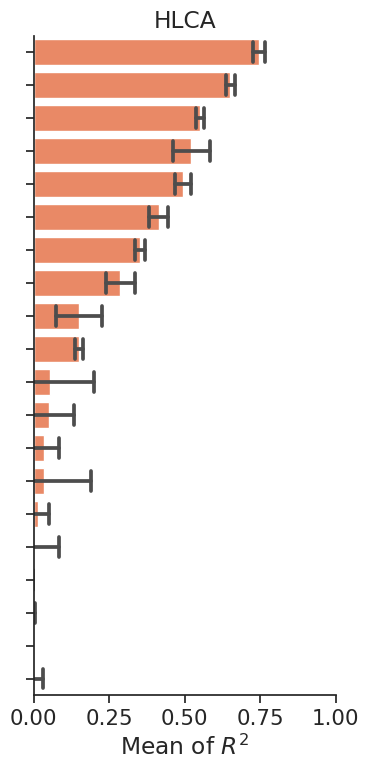

In [10]:
sns.set_theme(font_scale=1.4,
              style="ticks",
              rc={"axes.spines.right": False, "axes.spines.top": False, 'figure.figsize':(4,8)}
             )
plot_data = smoker_table.loc[:,["R2","ind"]]
# keep top 15
plot_data = plot_data.iloc[:100,]

ax = sns.barplot(
    data=plot_data, x="R2", y="ind",color = "#FF7F50",
    errorbar = "sd", capsize=.6, errcolor=".3"
)
ax.set_xlabel(r"Mean of $R^2$")
ax.set_ylabel(None)
ax.set_yticklabels([])
ax.set_title("HLCA")
ax.set_xlim(0,1)
plt.tight_layout()
if not os.path.isdir("results/figs"):
    os.mkdir("results/figs")
plt.savefig("results/figs/R2_hlca_smoker.svg")

table info for the plot

In [11]:
smoker_table.loc[smoker_table["R2_mean"] >= 0.5,].loc[:,["cell_type","R2_mean"]]

,cell_type,R2_mean
24,Smooth muscle,0.745233
27,Smooth muscle,0.745233
17,Smooth muscle,0.745233
16,Smooth muscle,0.745233
12,Smooth muscle,0.745233
57,EC venous systemic,0.649827
80,EC venous systemic,0.649827
61,EC venous systemic,0.649827
74,EC venous systemic,0.649827
58,EC venous systemic,0.649827


In [12]:
del(smoker_table["R2"])
del(smoker_table["rep"])
del(smoker_table["pred_age"])
del(smoker_table["true_age"])
tab = smoker_table.drop_duplicates().loc[:,["cell_type","gene_type","all_donor_num"]].iloc[:20,]
for i in range(20):
    tab.iloc[i,1] = gene_simplify[tab.iloc[i,1]]
tab

,cell_type,gene_type,all_donor_num
24,Smooth muscle,Union,10
57,EC venous systemic,Union,11
151,CD4 T cells,Union,20
130,EC arterial,Fridman,16
154,Mast cells,Union,14
286,Secretory,CellAge,22
290,Interstitial Mφ perivascular,Union,18
318,CD8 T cells,CellAge,21
407,EC venous,All,23
470,B cell lineage,All,15


## R2 for cross data sets validation

In [18]:
table = pd.read_csv("results/eval/performance_CD_polyEN.csv",index_col = 0)

In [19]:
nonsmoker_table = table.loc[table['group'] == "nonsmoker",]
dfs = []
n_rep = 5
for i,((annLevel,ct),df) in enumerate(nonsmoker_table.groupby(["ann_level","cell_type"])):
    ct_df = []
    for (gene_type,use_pca),dff in df.groupby(["gene_type","use_pca"]):
        dff["R2_mean"] = dff["R2"].mean()
        ct_df.append(dff)
    ct_df = pd.concat(ct_df)    
    ct_df.sort_values(by = "R2_mean",ascending = False,inplace=True)
    ct_df = ct_df.iloc[0:n_rep,] # pick the best one for each cell type
    ct_df["ind"] = str(i)
    dfs.append(ct_df)
    #df["R2_mean"] = df["R2"].mean()
    #df["ind"] = str(i)
    #dfs.append(df)

nonsmoker_table = pd.concat(dfs).sort_values(by = "R2_mean", ascending = False)

smoker_table = table.loc[table['group'] == "smoker",]
dfs = []
for i,((annLevel,ct),df) in enumerate(smoker_table.groupby(["ann_level","cell_type"])):
    ct_df = []
    for (gene_type,use_pca),dff in df.groupby(["gene_type","use_pca"]):
        dff["R2_mean"] = dff["R2"].mean()
        ct_df.append(dff)
    ct_df = pd.concat(ct_df)    
    ct_df.sort_values(by = "R2_mean",ascending = False,inplace=True)
    ct_df = ct_df.iloc[0:n_rep,] # pick the best one for each cell type
    ct_df["ind"] = str(i)
    dfs.append(ct_df)
    
smoker_table = pd.concat(dfs).sort_values(by = "R2_mean", ascending = False)

**plot nonsmoker**

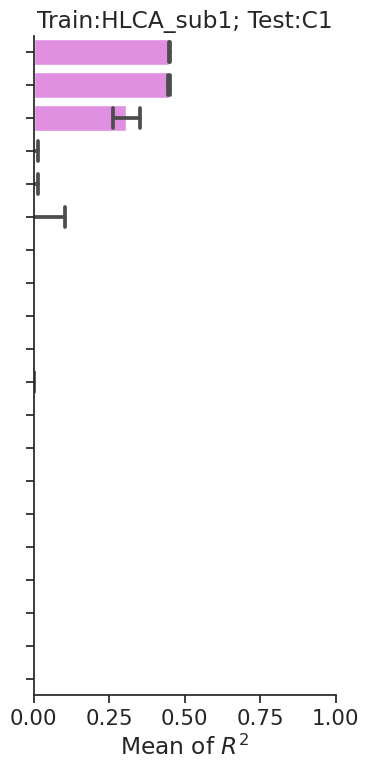

In [20]:
sns.set_theme(font_scale=1.4,
              style="ticks",
              rc={"axes.spines.right": False, "axes.spines.top": False, 'figure.figsize':(4,8)}
             )
plot_data = nonsmoker_table.loc[:,["R2","ind"]]
# keep top 15
plot_data = plot_data.iloc[:100,]

ax = sns.barplot(
    data=plot_data, x="R2", y="ind",color = "violet",
    errorbar = "sd", capsize=.6, errcolor=".3"
)
ax.set_xlabel(r"Mean of $R^2$")
ax.set_ylabel(None)
ax.set_yticklabels([])
ax.set_title("Train:HLCA_sub1; Test:C1")
ax.set_xlim(0,1)
plt.tight_layout()
if not os.path.isdir("results/figs"):
    os.mkdir("results/figs")
plt.savefig("results/figs/R2_cross_dataset_nonsmoker.svg")

table for the plot

In [21]:
del(nonsmoker_table["pred_age"])
del(nonsmoker_table["true_age"])
del(nonsmoker_table["R2"])
del(nonsmoker_table["MAE"])
del(nonsmoker_table["rep"])
tab = nonsmoker_table.drop_duplicates().loc[:,["cell_type","gene_type","Donor_num_train","Donor_num_test"]].iloc[:20,]
for i in range(20):
    tab.iloc[i,1] = gene_simplify[tab.iloc[i,1]]
tab

,cell_type,gene_type,Donor_num_train,Donor_num_test
8990,Club (non-nasal),All,15,7
7130,Club,All,15,7
5339,Basal,All,14,6
6058,Mast cells,All,14,5
7396,EC general capillary,SASP2,6,8
5485,EC capillary,SenMayo,6,10
6629,Adventitial fibroblasts,SenMayo,5,8
6794,B cells,SASP2,11,15
6956,CD4 T cells,All,15,19
7675,Interstitial macrophages,All,15,30


**plot smoker**

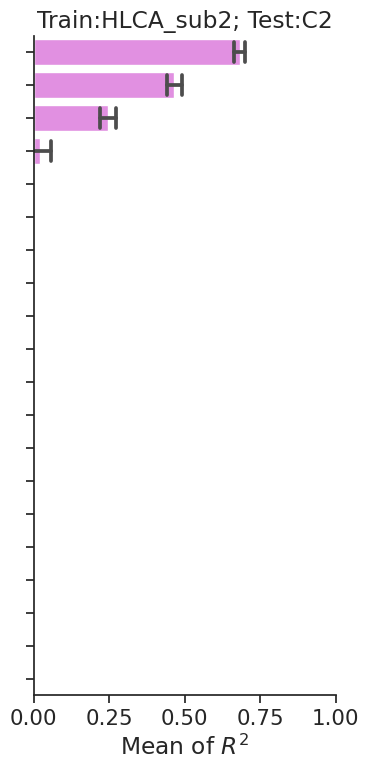

In [22]:
sns.set_theme(font_scale=1.4,
              style="ticks",
              rc={"axes.spines.right": False, "axes.spines.top": False, 'figure.figsize':(4,8)}
             )
plot_data = smoker_table.loc[:,["R2","ind"]]
# keep top 15
plot_data = plot_data.iloc[:100,]

ax = sns.barplot(
    data=plot_data, x="R2", y="ind",color = "violet",
    errorbar = "sd", capsize=.6, errcolor=".3"
)
ax.set_xlabel(r"Mean of $R^2$")
ax.set_ylabel(None)
ax.set_yticklabels([])
ax.set_title("Train:HLCA_sub2; Test:C2")
ax.set_xlim(0,1)
plt.tight_layout()
if not os.path.isdir("results/figs"):
    os.mkdir("results/figs")
plt.savefig("results/figs/R2_cross_dataset_smoker.svg")

table for the plot

In [23]:
del(smoker_table["R2"])
del(smoker_table["MAE"])
del(smoker_table["rep"])
del(smoker_table["pred_age"])
del(smoker_table["true_age"])
tab = smoker_table.drop_duplicates().loc[:,["cell_type","gene_type","Donor_num_train","Donor_num_test"]].iloc[:20,]
for i in range(20):
    tab.iloc[i,1] = gene_simplify[tab.iloc[i,1]]
tab

,cell_type,gene_type,Donor_num_train,Donor_num_test
2938,EC venous systemic,All,5,6
530,Smooth muscle,All,5,6
2035,Adventitial fibroblasts,All,7,9
295,Lymphatic EC,All,7,6
2194,B cells,CellAge,5,9
1855,Secretory,All,12,11
3212,Multiciliated,CellAge,13,13
2155,Alveolar macrophages,All,16,20
2456,Classical monocytes,All,19,16
717,B cell lineage,All,8,12


## R2 for nucseq data

In [24]:
nonsmoker_table = pd.read_csv("results/eval/performances_nucseq_loo_polyEN.csv")

In [25]:
dfs = []
n_rep = 5
for i,(ct,df) in enumerate(nonsmoker_table.groupby("Cell type(Nuc-seq)")):
    ct_df = []
    for (gene_type,use_pca),dff in df.groupby(["gene_type","use_pca"]):
        dff["R2_mean"] = dff["R2"].mean()
        ct_df.append(dff)
    ct_df = pd.concat(ct_df)    
    ct_df.sort_values(by = "R2_mean",ascending = False,inplace=True)
    ct_df = ct_df.iloc[0:n_rep,] # pick the best one for each cell type
    ct_df["ind"] = str(i)
    dfs.append(ct_df)
nonsmoker_table = pd.concat(dfs).sort_values(by = "R2_mean", ascending = False)

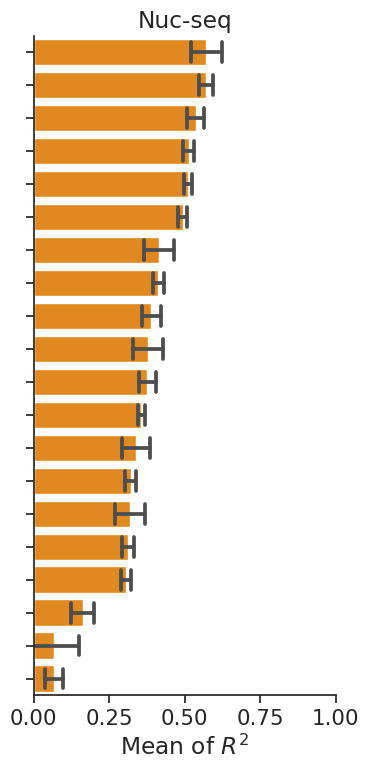

In [26]:
sns.set_theme(font_scale=1.4,
              style="ticks",
              rc={"axes.spines.right": False, "axes.spines.top": False, 'figure.figsize':(4,8)}
             )

# Plot the top 20
plot_data = nonsmoker_table.loc[:,["R2","ind"]].iloc[:100,]

ax = sns.barplot(
    data=plot_data, x="R2", y="ind",color = "darkorange",
    errorbar = "sd", capsize=.6, errcolor=".3"
)

ax.set_xlabel(r"Mean of $R^2$")
ax.set_ylabel(None)
ax.set_yticklabels([])
ax.set_title("Nuc-seq")
ax.set_xlim(0,1)
plt.tight_layout()
if not os.path.isdir("results/figs"):
    os.mkdir("results/figs")
plt.savefig("results/figs/R2_nucseq_nonsmoker.svg")

table info

In [27]:
del(nonsmoker_table["R2"])
del(nonsmoker_table["rep"])
del(nonsmoker_table["pred_age"])
del(nonsmoker_table["true_age"])
tab = nonsmoker_table.drop_duplicates().loc[:,["Cell type(Nuc-seq)","gene_type","donor_num"]].iloc[:20,]
for i in range(20):
    tab.iloc[i,1] = gene_simplify[tab.iloc[i,1]]
tab

,Cell type(Nuc-seq),gene_type,donor_num
3,Macrophage.type2,Union,13
4,VEcapillary,CellAge,18
5,Treg,SASP2,18
15,Mast,SASP2,11
32,VEaerocyte,CellAge,18
39,cDC,All,11
52,AT2transitional,All,16
63,FibroblastAdventitial,SASP2,17
48,Goblet,All,13
75,B.type3,Fridman,10
